In [44]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

titanic = train.copy()   # your core uses "titanic"
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


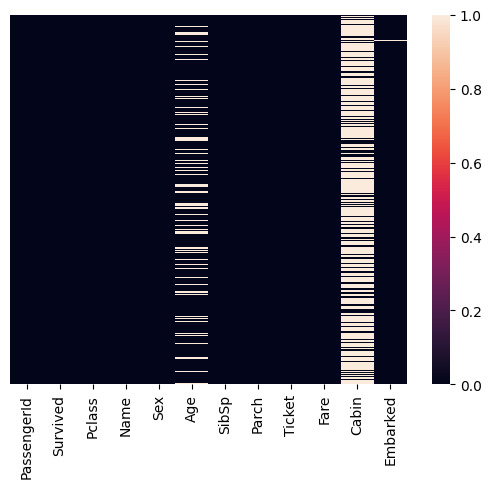

In [46]:
titanic.isnull().sum()
sns.heatmap(titanic.isnull(), yticklabels=False);



In [47]:
titanic['Age'] = pd.to_numeric(titanic['Age'], errors='coerce')

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age, axis=1)



C:\Users\princ\AppData\Local\Temp\ipykernel_15060\1406027802.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\princ\AppData\Local\Temp\ipykernel_15060\1406027802.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


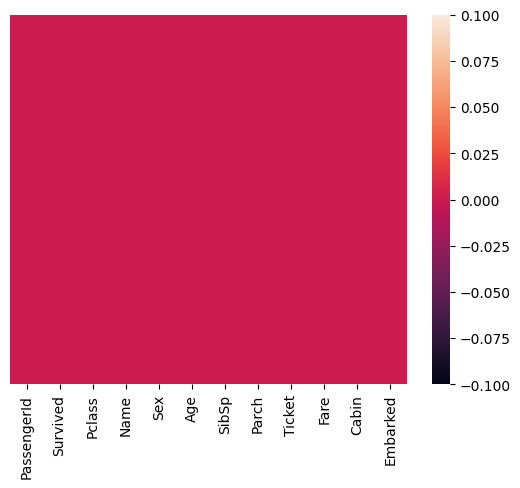

In [48]:
titanic.dropna(inplace=True)
sns.heatmap(titanic.isnull(), yticklabels=False);


In [49]:
Sex = pd.get_dummies(titanic['Sex'], drop_first=True)
Embarked = pd.get_dummies(titanic['Embarked'], drop_first=True)


In [50]:
titanic.drop(['Sex','Name','PassengerId','Ticket','Cabin','Embarked'], axis=1, inplace=True)


In [51]:
titanic = pd.concat([titanic, Sex, Embarked], axis=1)
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  202 non-null    int64  
 1   Pclass    202 non-null    int64  
 2   Age       202 non-null    float64
 3   SibSp     202 non-null    int64  
 4   Parch     202 non-null    int64  
 5   Fare      202 non-null    float64
 6   male      202 non-null    bool   
 7   Q         202 non-null    bool   
 8   S         202 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 11.6 KB


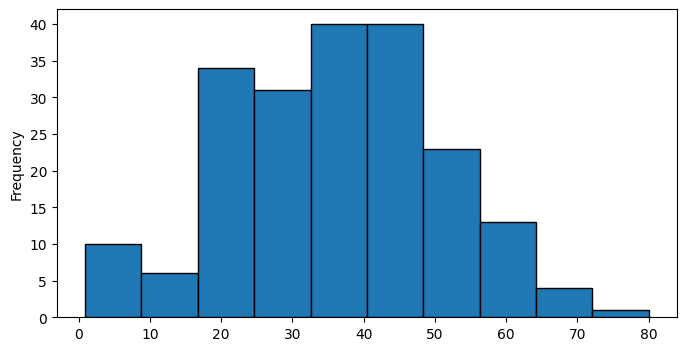

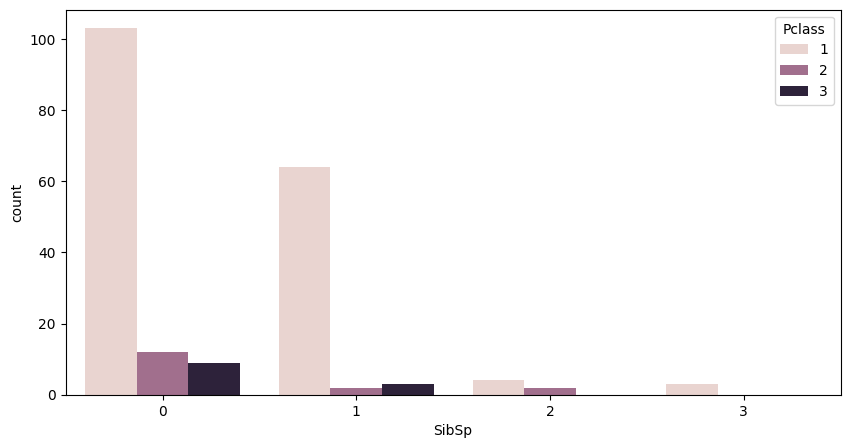

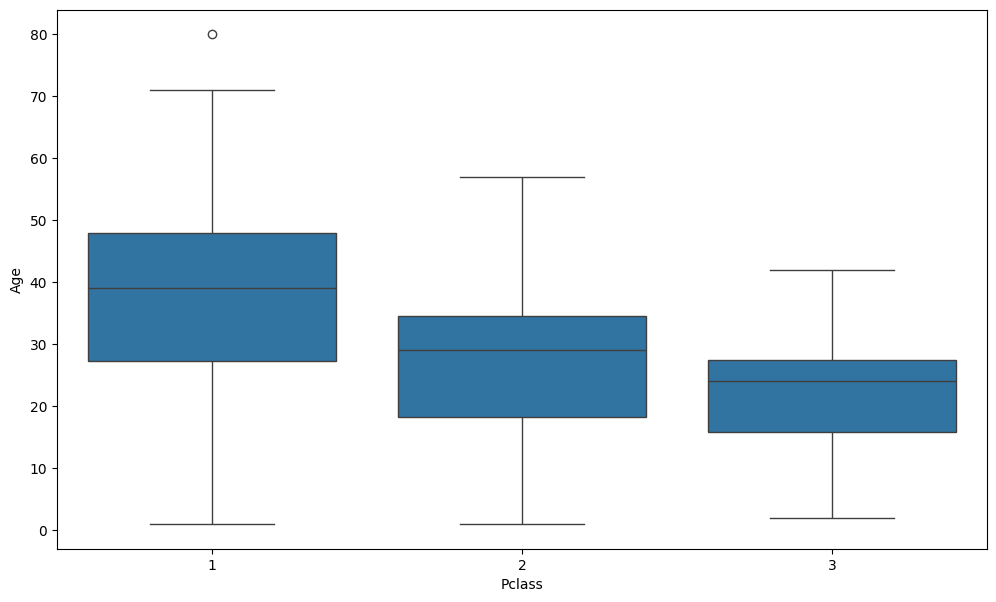

In [52]:
plt.figure(figsize=(8,4))
plt.xlabel('Age')
titanic['Age'].plot.hist(edgecolor='k');

figure = plt.figure(figsize=(10,5));
sns.countplot(x='SibSp', hue='Pclass', data=titanic);

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=titanic);


In [53]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']


In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X, y)


C:\Users\princ\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [55]:
test_data = test.copy()

# Convert Age
test_data['Age'] = pd.to_numeric(test_data['Age'], errors='coerce')
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# Fill Fare
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Fill Embarked
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Dummies
sex_test = pd.get_dummies(test_data['Sex'], drop_first=True)
embark_test = pd.get_dummies(test_data['Embarked'], drop_first=True)

test_data = pd.concat([test_data, sex_test, embark_test], axis=1)

# Ensure all required columns exist
for col in X.columns:
    if col not in test_data.columns:
        test_data[col] = 0

# Final feature selection (same as training)
test_data = test_data[X.columns]


C:\Users\princ\AppData\Local\Temp\ipykernel_15060\1278922335.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
C:\Users\princ\AppData\Local\Temp\ipykernel_15060\1278922335.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [56]:
predictions = model.predict(test_data)
predictions[:10]


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [57]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission.csv", index=False)
submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data = titanic);

In [ ]:
test_data = test.copy()

# Convert Age
test_data['Age'] = pd.to_numeric(test_data['Age'], errors='coerce')
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# Fill Fare
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Fill Embarked
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Dummy variables
sex_test = pd.get_dummies(test_data['Sex'], drop_first=True)
embark_test = pd.get_dummies(test_data['Embarked'], drop_first=True)

# Combine
test_data = pd.concat([test_data, sex_test, embark_test], axis=1)

# Make sure required columns exist (sometimes Q or S missing)
for col in ['male', 'Q', 'S']:
    if col not in test_data.columns:
        test_data[col] = 0

# Select same features used in training
test_data = test_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
